*Source of the case study:* https://8weeksqlchallenge.com/case-study-2/

---

## Case Study #2 - Pizza Runner

**Introduction**
<br>Did you know that over 115 million kilograms of pizza is consumed daily worldwide??? (Well according to Wikipedia anyway…)

Danny was scrolling through his Instagram feed when something really caught his eye - “80s Retro Styling and Pizza Is The Future!”

Danny was sold on the idea, but he knew that pizza alone was not going to help him get seed funding to expand his new Pizza Empire - so he had one more genius idea to combine with it - he was going to Uberize it - and so Pizza Runner was launched!

Danny started by recruiting “runners” to deliver fresh pizza from Pizza Runner Headquarters (otherwise known as Danny’s house) and also maxed out his credit card to pay freelance developers to build a mobile app to accept orders from customers.

**Available Data**
<br>Because Danny had a few years of experience as a data scientist - he was very aware that data collection was going to be critical for his business’ growth.

He has prepared for us an entity relationship diagram of his database design but requires further assistance to clean his data and apply some basic calculations so he can better direct his runners and optimise Pizza Runner’s operations.

You can inspect the entity relationship diagram and example data below.

**Entity Relationship Diagram**
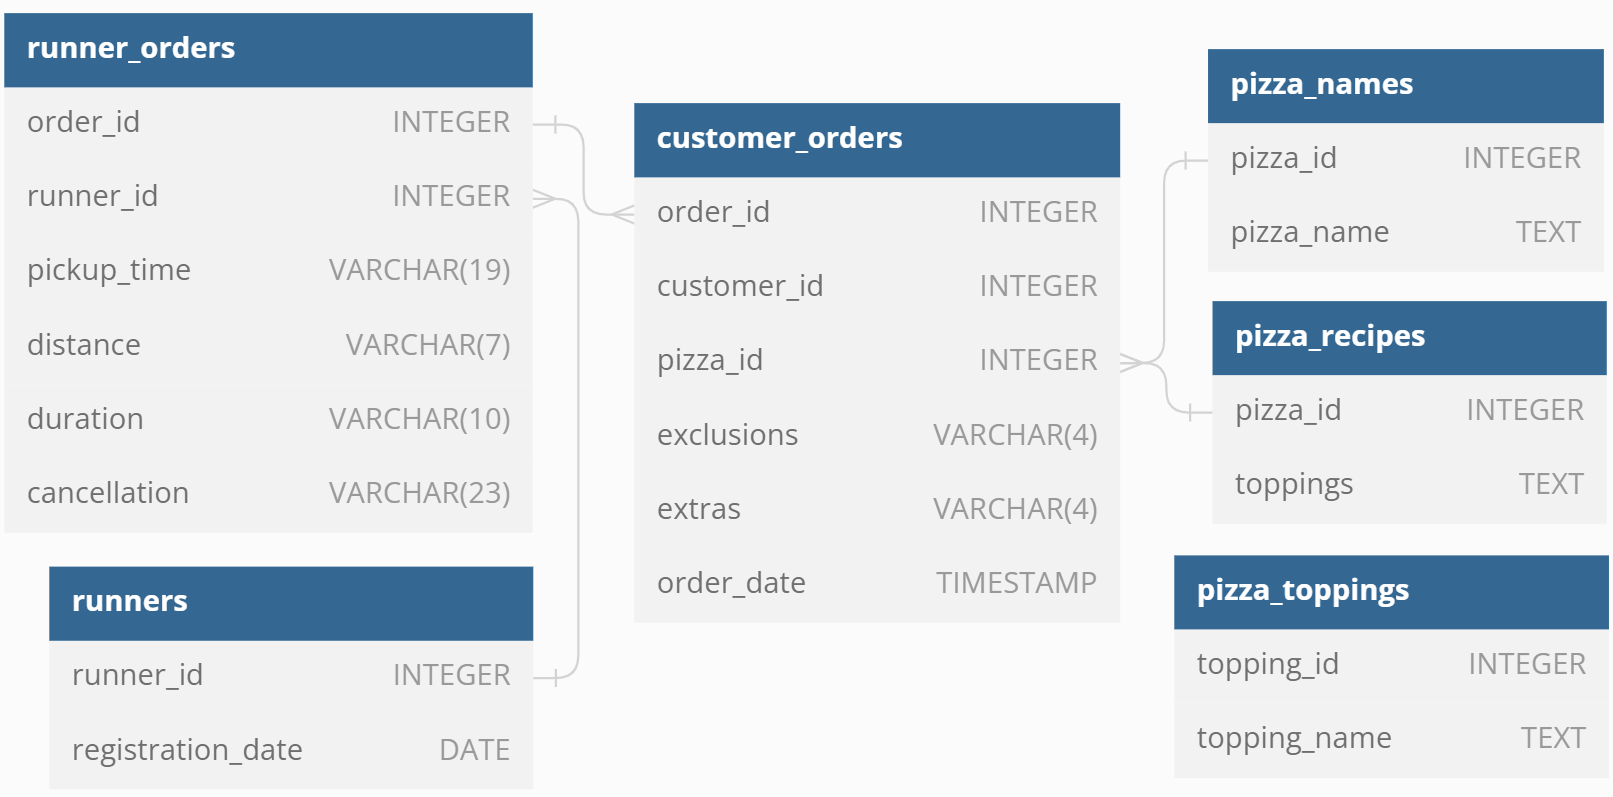

Danny has shared with you 6 key datasets for this case study:
- `runners` shows the `registration_date` for each new runner;
- `customer_orders` shows customer pizza orders (1 row for each individual pizza that is part of the order). 
    - The `pizza_id` relates to the type of pizza which was ordered whilst the `exclusions` are the `ingredient_id` values which should be removed from the pizza and the `extras` are the `ingredient_id` values which need to be added to the pizza.
    - Note that customers can order multiple pizzas in a single order with varying `exclusions` and `extras` values even if the pizza is the same type!
    - The `exclusions` and `extras` columns will need to be cleaned up before using them in your queries;
- `runner_orders`. After each orders are received through the system - they are assigned to a runner - however not all orders are fully completed and can be cancelled by the restaurant or the customer.
    - The `pickup_time` is the timestamp at which the runner arrives at the Pizza Runner headquarters to pick up the freshly cooked pizzas. The `distance` and `duration` fields are related to how far and long the runner had to travel to deliver the order to the respective customer.
    - There are some known data issues with this table so be careful when using this in your queries - make sure to check the data types for each column in the schema SQL!
- `pizza_names` contains pizzas name at Pizza Runner at the moment;
- `pizza_recipes`. Each `pizza_id` has a standard set of `toppings` which are used as part of the pizza recipe;
- `pizza_toppings`contains all of the `topping_name` values with their corresponding `topping_id` value.

All datasets exist within the `pizza_runner` database schema:

**Schema (PostgreSQL v15)**

    CREATE SCHEMA pizza_runner;
    SET search_path = pizza_runner;
    
    DROP TABLE IF EXISTS runners;
    CREATE TABLE runners (
      "runner_id" INTEGER,
      "registration_date" DATE
    );
    INSERT INTO runners
      ("runner_id", "registration_date")
    VALUES
      (1, '2021-01-01'),
      (2, '2021-01-03'),
      (3, '2021-01-08'),
      (4, '2021-01-15');
    
    
    DROP TABLE IF EXISTS customer_orders;
    CREATE TABLE customer_orders (
      "order_id" INTEGER,
      "customer_id" INTEGER,
      "pizza_id" INTEGER,
      "exclusions" VARCHAR(4),
      "extras" VARCHAR(4),
      "order_time" TIMESTAMP
    );
    
    INSERT INTO customer_orders
      ("order_id", "customer_id", "pizza_id", "exclusions", "extras", "order_time")
    VALUES
      ('1', '101', '1', '', '', '2020-01-01 18:05:02'),
      ('2', '101', '1', '', '', '2020-01-01 19:00:52'),
      ('3', '102', '1', '', '', '2020-01-02 23:51:23'),
      ('3', '102', '2', '', NULL, '2020-01-02 23:51:23'),
      ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
      ('4', '103', '1', '4', '', '2020-01-04 13:23:46'),
      ('4', '103', '2', '4', '', '2020-01-04 13:23:46'),
      ('5', '104', '1', 'null', '1', '2020-01-08 21:00:29'),
      ('6', '101', '2', 'null', 'null', '2020-01-08 21:03:13'),
      ('7', '105', '2', 'null', '1', '2020-01-08 21:20:29'),
      ('8', '102', '1', 'null', 'null', '2020-01-09 23:54:33'),
      ('9', '103', '1', '4', '1, 5', '2020-01-10 11:22:59'),
      ('10', '104', '1', 'null', 'null', '2020-01-11 18:34:49'),
      ('10', '104', '1', '2, 6', '1, 4', '2020-01-11 18:34:49');
    
    
    DROP TABLE IF EXISTS runner_orders;
    CREATE TABLE runner_orders (
      "order_id" INTEGER,
      "runner_id" INTEGER,
      "pickup_time" VARCHAR(19),
      "distance" VARCHAR(7),
      "duration" VARCHAR(10),
      "cancellation" VARCHAR(23)
    );
    
    INSERT INTO runner_orders
      ("order_id", "runner_id", "pickup_time", "distance", "duration", "cancellation")
    VALUES
      ('1', '1', '2020-01-01 18:15:34', '20km', '32 minutes', ''),
      ('2', '1', '2020-01-01 19:10:54', '20km', '27 minutes', ''),
      ('3', '1', '2020-01-03 00:12:37', '13.4km', '20 mins', NULL),
      ('4', '2', '2020-01-04 13:53:03', '23.4', '40', NULL),
      ('5', '3', '2020-01-08 21:10:57', '10', '15', NULL),
      ('6', '3', 'null', 'null', 'null', 'Restaurant Cancellation'),
      ('7', '2', '2020-01-08 21:30:45', '25km', '25mins', 'null'),
      ('8', '2', '2020-01-10 00:15:02', '23.4 km', '15 minute', 'null'),
      ('9', '2', 'null', 'null', 'null', 'Customer Cancellation'),
      ('10', '1', '2020-01-11 18:50:20', '10km', '10minutes', 'null');
    
    
    DROP TABLE IF EXISTS pizza_names;
    CREATE TABLE pizza_names (
      "pizza_id" INTEGER,
      "pizza_name" TEXT
    );
    INSERT INTO pizza_names
      ("pizza_id", "pizza_name")
    VALUES
      (1, 'Meatlovers'),
      (2, 'Vegetarian');
    
    
    DROP TABLE IF EXISTS pizza_recipes;
    CREATE TABLE pizza_recipes (
      "pizza_id" INTEGER,
      "toppings" TEXT
    );
    INSERT INTO pizza_recipes
      ("pizza_id", "toppings")
    VALUES
      (1, '1, 2, 3, 4, 5, 6, 8, 10'),
      (2, '4, 6, 7, 9, 11, 12');
    
    
    DROP TABLE IF EXISTS pizza_toppings;
    CREATE TABLE pizza_toppings (
      "topping_id" INTEGER,
      "topping_name" TEXT
    );
    INSERT INTO pizza_toppings
      ("topping_id", "topping_name")
    VALUES
      (1, 'Bacon'),
      (2, 'BBQ Sauce'),
      (3, 'Beef'),
      (4, 'Cheese'),
      (5, 'Chicken'),
      (6, 'Mushrooms'),
      (7, 'Onions'),
      (8, 'Pepperoni'),
      (9, 'Peppers'),
      (10, 'Salami'),
      (11, 'Tomatoes'),
      (12, 'Tomato Sauce');
---

**Case Study Questions**

Each of the following case study questions can be answered using a single SQL statement.
This case study has LOTS of questions - they are broken up by area of focus including:
- **A. Pizza Metrics**
    1. How many pizzas were ordered? => [my solution to question A.1](#queryA1)
    1. How many unique customer orders were made? => [my solution to question A.2](#queryA2)
    1. How many successful orders were delivered by each runner? => [my solution to question A.3](#queryA3)
    1. How many of each type of pizza was delivered? => [my solution to question A.4](#queryA4)
    1. How many Vegetarian and Meatlovers were ordered by each customer? => [my solution to question A.5](#queryA5)
    1. What was the maximum number of pizzas delivered in a single order? => [my solution to question A.6](#queryA6)
    1. For each customer, how many delivered pizzas had at least 1 change and how many had no changes? => [my solution to question A.7](#queryA7)
    1. How many pizzas were delivered that had both exclusions and extras? => [my solution to question A.8](#queryA8)
    1. What was the total volume of pizzas ordered for each hour of the day? => [my solution to question A.9](#queryA9)
    1. What was the volume of orders for each day of the week? => [my solution to question A.10](#queryA10)

- **B. Runner and Customer Experience**
    1. How many runners signed up for each 1 week period? (i.e. week starts 2021-01-01) => [my solution to question B.1](#queryB1)
    1. What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order? => [my solution to question B.2](#queryB2)
    1. Is there any relationship between the number of pizzas and how long the order takes to prepare? => [my solution to question B.3](#queryB3)
    1. What was the average distance travelled for each customer? => [my solution to question B.4](#queryB4)
    1. What was the difference between the longest and shortest delivery times for all orders? => [my solution to question B.5](#queryB5)
    1. What was the average speed for each runner for each delivery and do you notice any trend for these values? => [my solution to question B.6](#queryB6)
    1. What is the successful delivery percentage for each runner? => [my solution to question B.7](#queryB7)

- **C. Ingredient Optimisation**
    1. What are the standard ingredients for each pizza? => [my solution to question C.1](#queryC1)
    1. What was the most commonly added extra? => [my solution to question C.2](#queryC2)
    1. What was the most common exclusion? => [my solution to question C.3](#queryC3)
    1. Generate an order item for each record in the `customers_orders` table in the format of one of the following:
        - Meat Lovers
        - Meat Lovers - Exclude Beef
        - Meat Lovers - Extra Bacon
        - Meat Lovers - Exclude Cheese, Bacon - Extra Mushroom, Peppers  => [my solution to question C.4](#queryC4)
    1. Generate an alphabetically ordered comma separated ingredient list for each pizza order from the `customer_orders` table and add a 2x in front of any relevant ingredients
        - For example: "Meat Lovers: 2xBacon, Beef, ... , Salami" => [my solution to question C.5](#queryC5)
    1. What is the total quantity of each ingredient used in all delivered pizzas sorted by most frequent first? => [my solution to question C.6](#queryC6)

- **D. Pricing and Ratings**
    1. If a Meat Lovers pizza costs \\$12 and Vegetarian costs \\$10 and there were no charges for changes - how much money has Pizza Runner made so far if there are no delivery fees? => [my solution to question D.1](#queryD1)
    1. What if there was an additional \\$1 charge for any pizza extras?
        - Add cheese is \\$1 extra => [my solution to question D.2](#queryD2)
    1. The Pizza Runner team now wants to add an additional ratings system that allows customers to rate their runner, how would you design an additional table for this new dataset - generate a schema for this new table and insert your own data for ratings for each successful customer order between 1 to 5. => [my solution to question D.3](#queryD3)
    1. Using your newly generated table - can you join all of the information together to form a table which has the following information for successful deliveries?
        - `customer_id`
        - `order_id`
        - `runner_id`
        - `rating`
        - `order_time`
        - `pickup_time`
        - Time between order and pickup
        - Delivery duration
        - Average speed
        - Total number of pizzas => [my solution to question D.4](#queryD4)
    1. If a Meat Lovers pizza was \\$12 and Vegetarian \\$10 fixed prices with no cost for extras and each runner is paid \\$0.30 per kilometre traveled - how much money does Pizza Runner have left over after these deliveries? => [my solution to question D.5](#queryD5)

**Before you start writing your SQL queries however - you might want to investigate the data, you may want to do something with some of those null values and data types in the customer_orders and runner_orders tables!**

---

Before we start, let's prepare our data for analysis.
<br>First, let's clean `customer_orders` table by replacing string 'null' with NULL value:

**Query #1**

    CREATE TEMP TABLE customer_orders_clean AS
    (SELECT order_id, 
    	   customer_id, 
           pizza_id,
           CASE WHEN exclusions ILIKE 'null' OR exclusions='' THEN NULL
           		ELSE exclusions
           END AS exclusions,
           CASE WHEN extras ILIKE 'null' OR extras='' THEN NULL
           		ELSE extras
           END AS extras,
           order_time
    FROM pizza_runner.customer_orders);

There are no results to be displayed.

**Query #2**

    SELECT *
    FROM customer_orders_clean;

| order_id | customer_id | pizza_id | exclusions | extras | order_time               |
| -------- | ----------- | -------- | ---------- | ------ | ------------------------ |
| 1        | 101         | 1        |            |        | 2020-01-01T18:05:02.000Z |
| 2        | 101         | 1        |            |        | 2020-01-01T19:00:52.000Z |
| 3        | 102         | 1        |            |        | 2020-01-02T23:51:23.000Z |
| 3        | 102         | 2        |            |        | 2020-01-02T23:51:23.000Z |
| 4        | 103         | 1        | 4          |        | 2020-01-04T13:23:46.000Z |
| 4        | 103         | 1        | 4          |        | 2020-01-04T13:23:46.000Z |
| 4        | 103         | 2        | 4          |        | 2020-01-04T13:23:46.000Z |
| 5        | 104         | 1        |            | 1      | 2020-01-08T21:00:29.000Z |
| 6        | 101         | 2        |            |        | 2020-01-08T21:03:13.000Z |
| 7        | 105         | 2        |            | 1      | 2020-01-08T21:20:29.000Z |
| 8        | 102         | 1        |            |        | 2020-01-09T23:54:33.000Z |
| 9        | 103         | 1        | 4          | 1, 5   | 2020-01-10T11:22:59.000Z |
| 10       | 104         | 1        |            |        | 2020-01-11T18:34:49.000Z |
| 10       | 104         | 1        | 2, 6       | 1, 4   | 2020-01-11T18:34:49.000Z |

---

Then let's clean `runner_orders` table by replacing the 'null' string with NULL value. In addition, we need to remove any text from the `distance` and `duration` columns and change their data types, as well as change the data type of the `pickup_time` column:

**Query #3**

    CREATE TEMP TABLE runner_orders_clean AS
    (SELECT order_id, 
    	   runner_id, 
           CASE WHEN pickup_time ILIKE 'null' THEN NULL
           		ELSE pickup_time
           END AS pickup_time,
           CASE WHEN distance ILIKE 'null' THEN NULL
     			WHEN distance ILIKE '%km%' THEN TRIM('km' FROM distance)
           		ELSE distance
           END AS distance,
     	   CASE WHEN duration ILIKE 'null' THEN NULL
     			WHEN duration ILIKE '%minutes' THEN TRIM('minutes' FROM duration)
     			WHEN duration ILIKE '%minute' THEN TRIM('minute' FROM duration)
     			WHEN duration ILIKE '%mins%' THEN TRIM('mins' FROM duration)
           		ELSE duration
           END AS duration,
           CASE WHEN cancellation ILIKE 'null' OR cancellation='' THEN NULL
           		ELSE cancellation
           END AS cancellation
    FROM pizza_runner.runner_orders);

There are no results to be displayed.

**Query #4**

    SELECT *
    FROM runner_orders_clean;

| order_id | runner_id | pickup_time         | distance | duration | cancellation            |
| -------- | --------- | ------------------- | -------- | -------- | ----------------------- |
| 1        | 1         | 2020-01-01 18:15:34 | 20       | 32       |                         |
| 2        | 1         | 2020-01-01 19:10:54 | 20       | 27       |                         |
| 3        | 1         | 2020-01-03 00:12:37 | 13.4     | 20       |                         |
| 4        | 2         | 2020-01-04 13:53:03 | 23.4     | 40       |                         |
| 5        | 3         | 2020-01-08 21:10:57 | 10       | 15       |                         |
| 6        | 3         |                     |          |          | Restaurant Cancellation |
| 7        | 2         | 2020-01-08 21:30:45 | 25       | 25       |                         |
| 8        | 2         | 2020-01-10 00:15:02 | 23.4     | 15       |                         |
| 9        | 2         |                     |          |          | Customer Cancellation   |
| 10       | 1         | 2020-01-11 18:50:20 | 10       | 10       |                         |

**Query #5**

    ALTER TABLE runner_orders_clean
    ALTER COLUMN pickup_time TYPE TIMESTAMP
    USING pickup_time::timestamp,
    ALTER COLUMN distance TYPE FLOAT
    USING distance::float,
    ALTER COLUMN duration TYPE INT
    USING duration::integer;

There are no results to be displayed.

**Query #6**

    SELECT pg_typeof(pickup_time) AS typeof_pickup_time, 
    	   pg_typeof(distance) AS typeof_distance, 
           pg_typeof(duration) AS typeof_duration
    FROM runner_orders_clean
    LIMIT 1;

| typeof_pickup_time          | typeof_distance  | typeof_duration |
| --------------------------- | ---------------- | --------------- |
| timestamp without time zone | double precision | integer         |

---

Now we can start our analysis:

**A. Pizza Metrics**

<a id='queryA1'></a>
**A1. How many pizzas were ordered?**

**Query #7**
    
    SELECT COUNT(order_id) AS total_pizza_cnt
    FROM customer_orders_clean;

| total_pizza_cnt |
| --------------- |
| 14              |

---

<a id='queryA2'></a>
**A2.How many unique customer orders were made?**

**Query #8**

    SELECT COUNT(DISTINCT order_id) AS unique_order_cnt
    FROM customer_orders_clean;

| unique_order_cnt |
| ---------------- |
| 10               |

---

<a id='queryA3'></a>
**3.How many successful orders were delivered by each runner?**

**Query #9**
       
    SELECT runner_id,
    	   COUNT(distance) AS delivered_order_cnt
    FROM runner_orders_clean
    GROUP BY runner_id
    ORDER BY runner_id;

| runner_id | delivered_order_cnt |
| --------- | ------------------- |
| 1         | 4                   |
| 2         | 3                   |
| 3         | 1                   |

---

<a id='queryA4'></a>
**4.How many of each type of pizza was delivered?**

**Query #10**

    SELECT n.pizza_name,
    	   COUNT(r.distance) AS delivered_pizza_cnt
    FROM customer_orders_clean c
    LEFT JOIN runner_orders_clean r ON c.order_id=r.order_id
    LEFT JOIN pizza_runner.pizza_names n ON c.pizza_id=n.pizza_id
    GROUP BY n.pizza_name;

| pizza_name | delivered_pizza_cnt |
| ---------- | ------------------- |
| Meatlovers | 9                   |
| Vegetarian | 3                   |

---

<a id='queryA5'></a>
**5.How many Vegetarian and Meatlovers were ordered by each customer?**

**Query #11**

    SELECT c.customer_id,
    	   n.pizza_name,
    	   COUNT(c.order_id) AS ordered_pizza_cnt
    FROM customer_orders_clean c
    LEFT JOIN pizza_runner.pizza_names n ON c.pizza_id=n.pizza_id
    GROUP BY c.customer_id, n.pizza_name
    ORDER BY 1, 2;

| customer_id | pizza_name | ordered_pizza_cnt |
| ----------- | ---------- | ----------------- |
| 101         | Meatlovers | 2                 |
| 101         | Vegetarian | 1                 |
| 102         | Meatlovers | 2                 |
| 102         | Vegetarian | 1                 |
| 103         | Meatlovers | 3                 |
| 103         | Vegetarian | 1                 |
| 104         | Meatlovers | 3                 |
| 105         | Vegetarian | 1                 |

---

<a id='queryA6'></a>
**6.What was the maximum number of pizzas delivered in a single order?**

**Query #12**
    
    WITH t AS
    (SELECT c.order_id, COUNT(r.distance) AS delivered_pizza_cnt
    FROM customer_orders_clean c
    LEFT JOIN runner_orders_clean r ON c.order_id=r.order_id
    GROUP BY c.order_id)
    SELECT MAX(delivered_pizza_cnt) AS max_pizza_cnt
    FROM t;

| max_pizza_cnt |
| ------------- |
| 3             |

---

<a id='queryA7'></a>
**7.For each customer, how many delivered pizzas had at least 1 change and how many had no changes?** 

**Query #13**
    
    SELECT c.customer_id,
    	   COUNT(CASE WHEN c.exclusions IS NOT NULL OR c.extras IS NOT NULL THEN r.distance 
                 	  ELSE NULL
           		 END) AS delivered_changed_cnt,
           COUNT(CASE WHEN c.exclusions IS NULL AND c.extras IS NULL THEN r.distance
           		 	  ELSE NULL
                 END) AS delivered_original_cnt
    FROM customer_orders_clean c
    LEFT JOIN runner_orders_clean r ON c.order_id=r.order_id
    GROUP BY c.customer_id
    ORDER BY 1;

| customer_id | delivered_changed_cnt | delivered_original_cnt |
| ----------- | --------------------- | ---------------------- |
| 101         | 0                     | 2                      |
| 102         | 0                     | 3                      |
| 103         | 3                     | 0                      |
| 104         | 2                     | 1                      |
| 105         | 1                     | 0                      |

---

<a id='queryA8'></a>
**8.How many pizzas were delivered that had both exclusions and extras?**

    SELECT COUNT(CASE WHEN c.exclusions IS NOT NULL AND c.extras IS NOT NULL THEN r.distance 
                 	  ELSE NULL
           		 END) AS delivered_exclusion_extra_cnt
    FROM customer_orders_clean c
    LEFT JOIN runner_orders_clean r ON c.order_id=r.order_id;

| delivered_exclusion_extra_cnt |
| ----------------------------- |
| 1                             |

---

<a id='queryA9'></a>
**9.What was the total volume of pizzas ordered for each hour of the day?**

**Query #15**
    
    SELECT EXTRACT(HOUR from order_time) AS hour_of_day,
    	   COUNT(order_id) AS pizza_cnt
    FROM customer_orders_clean
    GROUP BY 1
    ORDER BY 1;

| hour_of_day | pizza_cnt |
| ----------- | --------- |
| 11          | 1         |
| 13          | 3         |
| 18          | 3         |
| 19          | 1         |
| 21          | 3         |
| 23          | 3         |

---

<a id='queryA10'></a>
**10.What was the volume of orders for each day of the week?**

**Query #16**

    SELECT EXTRACT(ISODOW FROM order_time) AS day_of_week,
    	   COUNT(DISTINCT order_id) AS orders_cnt
    FROM customer_orders_clean
    GROUP BY 1
    ORDER BY 1;

| day_of_week | orders_cnt |
| ----------- | ---------- |
| 3           | 5          |
| 4           | 2          |
| 5           | 1          |
| 6           | 2          |

---

**B. Runner and Customer Experience**

<a id='queryB1'></a>
**1.How many runners signed up for each 1 week period? (i.e. week starts 2020-01-01)**

**Query #17**
    
    SELECT EXTRACT(WEEK FROM (registration_date + 4)) AS week_number,
    	   COUNT(runner_id) AS new_runners_cnt
    FROM pizza_runner.runners
    GROUP BY 1
    ORDER BY 1;

| week_number | new_runners_cnt |
| ----------- | --------------- |
| 1           | 2               |
| 2           | 1               |
| 3           | 1               |

---

<a id='queryB2'></a>
**2.What was the average time in minutes it took for each runner to arrive at the Pizza Runner HQ to pickup the order?**

**Query #18**
    
    SELECT r.runner_id,
    	   EXTRACT(MINUTES FROM AVG(r.pickup_time - c.order_time)) AS avg_pickup_mins
    FROM runner_orders_clean r
    LEFT JOIN customer_orders_clean c ON r.order_id=c.order_id
    WHERE pickup_time IS NOT NULL
    GROUP BY 1
    ORDER BY 1;

| runner_id | avg_pickup_mins |
| --------- | --------------- |
| 1         | 15              |
| 2         | 23              |
| 3         | 10              |

---

<a id='queryB3'></a>
**3.Is there any relationship between the number of pizzas and how long the order takes to prepare?**

**Query #19**

    SELECT c.order_id,
    	   COUNT(c.pizza_id) AS pizza_cnt,
           EXTRACT(MINUTES FROM (r.pickup_time - c.order_time)) AS preparation_time
    FROM customer_orders_clean c
    LEFT JOIN runner_orders_clean r ON c.order_id=r.order_id
    WHERE pickup_time IS NOT NULL
    GROUP BY c.order_id, c.order_time, r.pickup_time
    ORDER BY 2 DESC, 3 DESC;

| order_id | pizza_cnt | preparation_time |
| -------- | --------- | ---------------- |
| 4        | 3         | 29               |
| 3        | 2         | 21               |
| 10       | 2         | 15               |
| 8        | 1         | 20               |
| 1        | 1         | 10               |
| 7        | 1         | 10               |
| 2        | 1         | 10               |
| 5        | 1         | 10               |

Let's check the correlation coefficient:

**Query #20**

    SELECT ROUND(CORR(pizza_cnt, preparation_time)::numeric, 3) AS corr_coef
    FROM 
    (SELECT c.order_id,
    	    COUNT(c.pizza_id) AS pizza_cnt,
            EXTRACT(MINUTES FROM (r.pickup_time - c.order_time)) AS preparation_time
    FROM customer_orders_clean c
    LEFT JOIN runner_orders_clean r ON c.order_id=r.order_id
    WHERE pickup_time IS NOT NULL
    GROUP BY c.order_id, c.order_time, r.pickup_time) t;

| corr_coef |
| --------- |
| 0.837     |

---

<a id='queryB4'></a>
**4.What was the average distance travelled for each customer?**

**Query #21**
    
    SELECT c.customer_id,
    	   ROUND(AVG(r.distance)::numeric, 1) AS km_to_customer
    FROM customer_orders_clean c
    LEFT JOIN runner_orders_clean r ON c.order_id=r.order_id
    WHERE pickup_time IS NOT NULL
    GROUP BY 1
    ORDER BY 2 DESC;

| customer_id | km_to_customer |
| ----------- | -------------- |
| 105         | 25.0           |
| 103         | 23.4           |
| 101         | 20.0           |
| 102         | 16.7           |
| 104         | 10.0           |

---

<a id='queryB5'></a>
**5.What was the difference between the longest and shortest delivery times for all orders?**

**Query #22**

    SELECT MAX(duration) - MIN(duration) AS delivery_timediff
    FROM runner_orders_clean;

| delivery_timediff |
| ----------------- |
| 30                |

---

<a id='queryB6'></a>
**6.What was the average speed for each runner for each delivery and do you notice any trend for these values?**

**Query #23**
    
    SELECT order_id,
    	   runner_id,
           EXTRACT(HOUR FROM pickup_time) AS hour_of_day,
    	   ROUND(AVG(distance/duration)::numeric, 1) AS speed_km_per_min
    FROM runner_orders_clean
    WHERE pickup_time IS NOT NULL
    GROUP BY 1, 2, 3
    ORDER BY 4 DESC;

| order_id | runner_id | hour_of_day | speed_km_per_min |
| -------- | --------- | ----------- | ---------------- |
| 8        | 2         | 0           | 1.6              |
| 7        | 2         | 21          | 1.0              |
| 10       | 1         | 18          | 1.0              |
| 2        | 1         | 19          | 0.7              |
| 3        | 1         | 0           | 0.7              |
| 5        | 3         | 21          | 0.7              |
| 4        | 2         | 13          | 0.6              |
| 1        | 1         | 18          | 0.6              |

---

<a id='queryB7'></a>
**7.What is the successful delivery percentage for each runner?**

**Query #24**

    SELECT runner_id,
    	   100 * COUNT(pickup_time)::float/COUNT(order_id) AS successful_delivery_percentage
    FROM runner_orders_clean
    GROUP BY 1
    ORDER BY 1;

| runner_id | successful_delivery_percentage |
| --------- | ------------------------------ |
| 1         | 100                            |
| 2         | 75                             |
| 3         | 50                             |

---

**C. Ingredient Optimisation**

<a id='queryC1'></a>
**1.What are the standard ingredients for each pizza?**

**Query #25**
    
    WITH temp AS
    (SELECT n.pizza_id,
     		n.pizza_name,
    	    UNNEST(string_to_array(r.toppings, ','))::int AS toppings
    FROM pizza_runner.pizza_recipes r
    JOIN pizza_runner.pizza_names n ON r.pizza_id=n.pizza_id)
    SELECT temp.pizza_name,
    	   t.topping_name
    FROM temp
    JOIN pizza_runner.pizza_toppings t ON temp.toppings=t.topping_id
    ORDER BY 1, 2;

| pizza_name | topping_name |
| ---------- | ------------ |
| Meatlovers | BBQ Sauce    |
| Meatlovers | Bacon        |
| Meatlovers | Beef         |
| Meatlovers | Cheese       |
| Meatlovers | Chicken      |
| Meatlovers | Mushrooms    |
| Meatlovers | Pepperoni    |
| Meatlovers | Salami       |
| Vegetarian | Cheese       |
| Vegetarian | Mushrooms    |
| Vegetarian | Onions       |
| Vegetarian | Peppers      |
| Vegetarian | Tomato Sauce |
| Vegetarian | Tomatoes     |

---

<a id='queryC2'></a>
**2.What was the most commonly added extra?**

**Query #26**
    
    WITH temp AS 
    (SELECT UNNEST(string_to_array(extras, ','))::int AS extras,
     		COUNT(extras) AS extras_cnt
     FROM customer_orders_clean
     GROUP BY 1)
    SELECT t.topping_name
    FROM temp
    LEFT JOIN pizza_runner.pizza_toppings t ON temp.extras=t.topping_id
    WHERE extras_cnt = (SELECT MAX(extras_cnt) FROM temp);

| topping_name |
| ------------ |
| Bacon        |

---

<a id='queryC3'></a>
**3.What was the most common exclusion?**

**Query #27**
    
    WITH temp AS 
    (SELECT UNNEST(string_to_array(exclusions, ','))::int AS exclusions,
     		COUNT(exclusions) AS exclusions_cnt
     FROM customer_orders_clean
     GROUP BY 1)
    SELECT t.topping_name
    FROM temp
    LEFT JOIN pizza_runner.pizza_toppings t ON temp.exclusions=t.topping_id
    WHERE exclusions_cnt = (SELECT MAX(exclusions_cnt) FROM temp);

| topping_name |
| ------------ |
| Cheese       |

---

Let's add an additional column with id number:

**Query #28**

    ALTER TABLE customer_orders_clean
    ADD COLUMN id INT GENERATED BY DEFAULT AS IDENTITY PRIMARY KEY;

There are no results to be displayed.

**Query #29**

    SELECT *
    FROM customer_orders_clean;

| order_id | customer_id | pizza_id | exclusions | extras | order_time               | id  |
| -------- | ----------- | -------- | ---------- | ------ | ------------------------ | --- |
| 1        | 101         | 1        |            |        | 2020-01-01T18:05:02.000Z | 1   |
| 2        | 101         | 1        |            |        | 2020-01-01T19:00:52.000Z | 2   |
| 3        | 102         | 1        |            |        | 2020-01-02T23:51:23.000Z | 3   |
| 3        | 102         | 2        |            |        | 2020-01-02T23:51:23.000Z | 4   |
| 4        | 103         | 1        | 4          |        | 2020-01-04T13:23:46.000Z | 5   |
| 4        | 103         | 1        | 4          |        | 2020-01-04T13:23:46.000Z | 6   |
| 4        | 103         | 2        | 4          |        | 2020-01-04T13:23:46.000Z | 7   |
| 5        | 104         | 1        |            | 1      | 2020-01-08T21:00:29.000Z | 8   |
| 6        | 101         | 2        |            |        | 2020-01-08T21:03:13.000Z | 9   |
| 7        | 105         | 2        |            | 1      | 2020-01-08T21:20:29.000Z | 10  |
| 8        | 102         | 1        |            |        | 2020-01-09T23:54:33.000Z | 11  |
| 9        | 103         | 1        | 4          | 1, 5   | 2020-01-10T11:22:59.000Z | 12  |
| 10       | 104         | 1        |            |        | 2020-01-11T18:34:49.000Z | 13  |
| 10       | 104         | 1        | 2, 6       | 1, 4   | 2020-01-11T18:34:49.000Z | 14  |

---

<a id='queryC4'></a>
**4.Generate an order item for each record in the customers_orders table in the format of one of the following:**
<BR>Meat Lovers
<BR>Meat Lovers - Exclude Beef
<BR>Meat Lovers - Extra Bacon
<BR>Meat Lovers - Exclude Cheese, Bacon - Extra Mushroom, Peppers

**Query #30**
    
    WITH temp1 AS
    (SELECT c.id,
     		c.order_id,
    	    n.pizza_name,
            UNNEST(string_to_array(exclusions, ','))::int AS exclusions,
            UNNEST(string_to_array(extras, ','))::int AS extras
    FROM customer_orders_clean c
    LEFT JOIN pizza_runner.pizza_names n ON c.pizza_id=n.pizza_id),
    temp2 AS
    (SELECT temp1.id,
     		temp1.order_id,
     		temp1.pizza_name,
     		temp1.exclusions,
     		t.topping_name AS exclusions_name,
     		temp1.extras
    FROM temp1
    LEFT JOIN pizza_runner.pizza_toppings t ON temp1.exclusions=t.topping_id),
    temp3 AS
    (SELECT temp2.*,
     		  t.topping_name AS extras_name
     FROM temp2
     LEFT JOIN pizza_runner.pizza_toppings t ON temp2.extras=t.topping_id),
    temp4 AS
    (SELECT c.id,
     		c.order_id,
      	    n.pizza_name,
      	    c.exclusions,
      	    NULL AS exclusions_name,
      	    c.extras,
     		NULL AS extras_name
     FROM customer_orders_clean c
     LEFT JOIN pizza_runner.pizza_names n ON c.pizza_id=n.pizza_id
     WHERE c.exclusions IS NULL AND c.extras IS NULL),
    union_table AS
    (SELECT id,
     		order_id,
     		pizza_name,
            exclusions_name,
            extras_name
    FROM temp4
    UNION ALL
    SELECT id,
     	   order_id,
       	   pizza_name,
           exclusions_name,
           extras_name
    FROM temp3),
    final_table AS      
    (SELECT id,
     		order_id,
    	    pizza_name,
            array_to_string(array_agg(exclusions_name), ', ') AS all_exclusions,
            array_to_string(array_agg(extras_name), ', ') AS all_extras
    FROM union_table
    GROUP BY 1, 2, 3)
    
    SELECT order_id,
    	   CASE WHEN all_exclusions<>'' AND all_extras<>'' THEN CONCAT(pizza_name, ' - Exclude ', all_exclusions, ' - Extra ', all_extras)
           		WHEN all_exclusions<>'' THEN CONCAT(pizza_name, ' - Exclude ', all_exclusions)
                WHEN all_extras<>'' THEN CONCAT(pizza_name, ' - Extra ', all_extras)
                ELSE pizza_name
           END AS order_item
    FROM final_table
    ORDER BY 1;

| order_id | order_item                                                      |
| -------- | --------------------------------------------------------------- |
| 1        | Meatlovers                                                      |
| 2        | Meatlovers                                                      |
| 3        | Meatlovers                                                      |
| 3        | Vegetarian                                                      |
| 4        | Meatlovers - Exclude Cheese                                     |
| 4        | Meatlovers - Exclude Cheese                                     |
| 4        | Vegetarian - Exclude Cheese                                     |
| 5        | Meatlovers - Extra Bacon                                        |
| 6        | Vegetarian                                                      |
| 7        | Vegetarian - Extra Bacon                                        |
| 8        | Meatlovers                                                      |
| 9        | Meatlovers - Exclude Cheese - Extra Bacon, Chicken              |
| 10       | Meatlovers                                                      |
| 10       | Meatlovers - Exclude Mushrooms, BBQ Sauce - Extra Cheese, Bacon |

---

Let's create some temporary tables:

**Query #31**
    
    CREATE TEMP TABLE orders AS
    WITH temp1 AS
    (SELECT c.id,
     		c.order_id,
    	    n.pizza_name,
            UNNEST(string_to_array(exclusions, ','))::int AS exclusions,
            UNNEST(string_to_array(extras, ','))::int AS extras
    FROM customer_orders_clean c
    LEFT JOIN pizza_runner.pizza_names n ON c.pizza_id=n.pizza_id),
    temp2 AS
    (SELECT temp1.id,
     		temp1.order_id,
     		temp1.pizza_name,
     		temp1.exclusions,
     		t.topping_name AS exclusions_name,
     		temp1.extras
    FROM temp1
    LEFT JOIN pizza_runner.pizza_toppings t ON temp1.exclusions=t.topping_id),
    temp3 AS
    (SELECT temp2.*,
     		  t.topping_name AS extras_name
     FROM temp2
     LEFT JOIN pizza_runner.pizza_toppings t ON temp2.extras=t.topping_id),
    temp4 AS
    (SELECT c.id,
     		c.order_id,
      	    n.pizza_name,
      	    c.exclusions,
      	    NULL AS exclusions_name,
      	    c.extras,
     		NULL AS extras_name
     FROM customer_orders_clean c
     LEFT JOIN pizza_runner.pizza_names n ON c.pizza_id=n.pizza_id
     WHERE c.exclusions IS NULL AND c.extras IS NULL)
    SELECT id,
     		order_id,
     		pizza_name,
            exclusions_name,
            extras_name
    FROM temp4
    UNION ALL
    SELECT id,
     	   order_id,
       	   pizza_name,
           exclusions_name,
           extras_name
    FROM temp3;

There are no results to be displayed.

---
**Query #32**

    SELECT *
    FROM orders
    ORDER BY 1;

| id  | order_id | pizza_name | exclusions_name | extras_name |
| --- | -------- | ---------- | --------------- | ----------- |
| 1   | 1        | Meatlovers |                 |             |
| 2   | 2        | Meatlovers |                 |             |
| 3   | 3        | Meatlovers |                 |             |
| 4   | 3        | Vegetarian |                 |             |
| 5   | 4        | Meatlovers | Cheese          |             |
| 6   | 4        | Meatlovers | Cheese          |             |
| 7   | 4        | Vegetarian | Cheese          |             |
| 8   | 5        | Meatlovers |                 | Bacon       |
| 9   | 6        | Vegetarian |                 |             |
| 10  | 7        | Vegetarian |                 | Bacon       |
| 11  | 8        | Meatlovers |                 |             |
| 12  | 9        | Meatlovers | Cheese          | Bacon       |
| 12  | 9        | Meatlovers |                 | Chicken     |
| 13  | 10       | Meatlovers |                 |             |
| 14  | 10       | Meatlovers | Mushrooms       | Cheese      |
| 14  | 10       | Meatlovers | BBQ Sauce       | Bacon       |

**Query #33**

    CREATE TEMP TABLE ingredients AS
    WITH temp1 AS
    (SELECT n.pizza_id,
     		n.pizza_name,
    	    UNNEST(string_to_array(r.toppings, ','))::int AS toppings
    FROM pizza_runner.pizza_recipes r
    JOIN pizza_runner.pizza_names n ON r.pizza_id=n.pizza_id),
    temp2 AS
    (SELECT temp1.pizza_name,
    	   	t.topping_name
    FROM temp1
    JOIN pizza_runner.pizza_toppings t ON temp1.toppings=t.topping_id
    ORDER BY 1, 2)
    SELECT pizza_name,
    	   array_to_string(array_agg(topping_name), ', ') AS all_toppings
    FROM temp2
    GROUP BY pizza_name;

There are no results to be displayed.

---
**Query #34**

    SELECT *
    FROM ingredients;

| pizza_name | all_toppings                                                          |
| ---------- | --------------------------------------------------------------------- |
| Meatlovers | BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami |
| Vegetarian | Cheese, Mushrooms, Onions, Peppers, Tomato Sauce, Tomatoes            |

---
**Query #35**

    CREATE TEMP TABLE pizza_orders_ingredients AS
    WITH t AS
    (SELECT o.id,
    	    o.order_id,
            o.pizza_name,
    	    o.exclusions_name,
     		CASE WHEN o.exclusions_name IS NOT NULL AND LEAD(o.exclusions_name) OVER (PARTITION BY o.id ORDER BY o.id, o.exclusions_name) IS NOT NULL THEN REPLACE(REPLACE(i.all_toppings, o.exclusions_name, ''), LEAD(o.exclusions_name) OVER (PARTITION BY o.id ORDER BY o.id, o.exclusions_name), '')
     			 WHEN o.exclusions_name IS NOT NULL AND LEAD(o.exclusions_name) OVER (PARTITION BY o.id ORDER BY o.id, o.exclusions_name) IS NULL THEN REPLACE(i.all_toppings, o.exclusions_name, '')
     			 ELSE i.all_toppings
     		END AS toppings_exclusions,
            o.extras_name
    FROM orders o
    LEFT JOIN ingredients i ON o.pizza_name=i.pizza_name
    ORDER BY 1),
    temp AS
    (SELECT id,
    	    order_id,
            pizza_name,
     		extras_name,
            CASE WHEN extras_name IS NOT NULL THEN CONCAT(extras_name, ', ', LEAD(extras_name) OVER (PARTITION BY id ORDER BY id, extras_name), ', ',  toppings_exclusions)
     			 ELSE toppings_exclusions
     		END AS necessary_toppings
    FROM t)
    SELECT DISTINCT ON(id)
    	   id,
           order_id,
           pizza_name,
           REPLACE((TRIM(LEADING ', ' FROM necessary_toppings)), ', , ', ', ') AS pizza_ingredients
    FROM temp;

There are no results to be displayed.

---
**Query #36**

    SELECT *
    FROM pizza_orders_ingredients;

| id  | order_id | pizza_name | pizza_ingredients                                                             |
| --- | -------- | ---------- | ----------------------------------------------------------------------------- |
| 1   | 1        | Meatlovers | BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami         |
| 2   | 2        | Meatlovers | BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami         |
| 3   | 3        | Meatlovers | BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami         |
| 4   | 3        | Vegetarian | Cheese, Mushrooms, Onions, Peppers, Tomato Sauce, Tomatoes                    |
| 5   | 4        | Meatlovers | BBQ Sauce, Bacon, Beef, Chicken, Mushrooms, Pepperoni, Salami                 |
| 6   | 4        | Meatlovers | BBQ Sauce, Bacon, Beef, Chicken, Mushrooms, Pepperoni, Salami                 |
| 7   | 4        | Vegetarian | Mushrooms, Onions, Peppers, Tomato Sauce, Tomatoes                            |
| 8   | 5        | Meatlovers | Bacon, BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami  |
| 9   | 6        | Vegetarian | Cheese, Mushrooms, Onions, Peppers, Tomato Sauce, Tomatoes                    |
| 10  | 7        | Vegetarian | Bacon, Cheese, Mushrooms, Onions, Peppers, Tomato Sauce, Tomatoes             |
| 11  | 8        | Meatlovers | BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami         |
| 12  | 9        | Meatlovers | Bacon, Chicken, BBQ Sauce, Bacon, Beef, Chicken, Mushrooms, Pepperoni, Salami |
| 13  | 10       | Meatlovers | BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami         |
| 14  | 10       | Meatlovers | Bacon, Cheese, Bacon, Beef, Cheese, Chicken, Pepperoni, Salami                |

---

<a id='queryC5'></a>
**5. Generate an alphabetically ordered comma separated ingredient list for each pizza order from the customer_orders table and  add a 2x in front of any relevant ingredients**
<BR>For example: "Meat Lovers: 2xBacon, Beef, ... , Salami"

**Query #37**
    
    WITH t AS
    (SELECT id,
    	   order_id,
           pizza_name,
           UNNEST(string_to_array(pizza_ingredients, ', ')) AS ingredient
    FROM pizza_orders_ingredients
    ORDER BY 1, 2, 4),
    temp AS
    (SELECT id,
    	   order_id,
           pizza_name,
    	   CASE WHEN COUNT(ingredient) OVER (PARTITION BY id, ingredient ORDER BY ingredient) > 1 THEN CONCAT('2x', ingredient)
           		ELSE ingredient
           END AS ingredients
    FROM t)
    SELECT order_id,
           CONCAT(pizza_name, ': ', array_to_string(array_agg(DISTINCT ingredients), ', ')) AS pizza_order_ingredients
    FROM temp
    GROUP BY id, order_id, pizza_name;

| order_id | pizza_order_ingredients                                                             |
| -------- | ----------------------------------------------------------------------------------- |
| 1        | Meatlovers: BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami   |
| 2        | Meatlovers: BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami   |
| 3        | Meatlovers: BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami   |
| 3        | Vegetarian: Cheese, Mushrooms, Onions, Peppers, Tomato Sauce, Tomatoes              |
| 4        | Meatlovers: BBQ Sauce, Bacon, Beef, Chicken, Mushrooms, Pepperoni, Salami           |
| 4        | Meatlovers: BBQ Sauce, Bacon, Beef, Chicken, Mushrooms, Pepperoni, Salami           |
| 4        | Vegetarian: Mushrooms, Onions, Peppers, Tomato Sauce, Tomatoes                      |
| 5        | Meatlovers: 2xBacon, BBQ Sauce, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami |
| 6        | Vegetarian: Cheese, Mushrooms, Onions, Peppers, Tomato Sauce, Tomatoes              |
| 7        | Vegetarian: Bacon, Cheese, Mushrooms, Onions, Peppers, Tomato Sauce, Tomatoes       |
| 8        | Meatlovers: BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami   |
| 9        | Meatlovers: 2xBacon, 2xChicken, BBQ Sauce, Beef, Mushrooms, Pepperoni, Salami       |
| 10       | Meatlovers: BBQ Sauce, Bacon, Beef, Cheese, Chicken, Mushrooms, Pepperoni, Salami   |
| 10       | Meatlovers: 2xBacon, 2xCheese, Beef, Chicken, Pepperoni, Salami                     |

---

<a id='queryC6'></a>
**6.What is the total quantity of each ingredient used in all delivered pizzas sorted by most frequent first?** 

**Query #38**

    WITH t AS
    (SELECT id,
    	    order_id,
            pizza_name,
            UNNEST(string_to_array(pizza_ingredients, ', ')) AS ingredient
    FROM pizza_orders_ingredients
    ORDER BY 1, 2, 4),
    temp AS
    (SELECT DISTINCT ON(id,ingredient)
    	   id,
           order_id,
           pizza_name,
           ingredient,
           COUNT(ingredient) OVER (PARTITION BY id, ingredient ORDER BY ingredient) AS ingredient_cnt
    FROM t)
    SELECT ingredient, 
    	   SUM(ingredient_cnt) AS total_ingredient_cnt
    FROM temp
    LEFT JOIN runner_orders_clean r ON temp.order_id = r.order_id
    WHERE temp.order_id IN (SELECT r.order_id FROM runner_orders_clean r WHERE pickup_time IS NOT NULL)
    GROUP BY 1
    ORDER BY 2 DESC, 1;

| ingredient   | total_ingredient_cnt |
| ------------ | -------------------- |
| Bacon        | 12                   |
| Mushrooms    | 11                   |
| Cheese       | 10                   |
| Beef         | 9                    |
| Chicken      | 9                    |
| Pepperoni    | 9                    |
| Salami       | 9                    |
| BBQ Sauce    | 8                    |
| Onions       | 3                    |
| Peppers      | 3                    |
| Tomato Sauce | 3                    |
| Tomatoes     | 3                    |

---

**D. Pricing and Ratings**

<a id='queryD1'></a>
**1.If a Meat Lovers pizza costs \\$12 and Vegetarian costs \\$10 and there were no charges for changes - how much money has Pizza Runner made so far if there are no delivery fees?**

**Query #39**

    SELECT o.pizza_id, 
    	   n.pizza_name,
           CASE WHEN n.pizza_name LIKE 'Meatlovers' THEN COUNT(o.order_id) *12
           		ELSE COUNT(o.order_id) *10
           END AS pizza_revenue
    FROM customer_orders_clean o
    LEFT JOIN pizza_runner.pizza_names n ON o.pizza_id = n.pizza_id
    LEFT JOIN runner_orders_clean r ON o.order_id = r.order_id
    WHERE r.pickup_time	IS NOT NULL
    GROUP BY 1, 2;

| pizza_id | pizza_name | pizza_revenue |
| -------- | ---------- | ------------- |
| 1        | Meatlovers | 108           |
| 2        | Vegetarian | 30            |

---
**Query #40**

    SELECT SUM(
           CASE WHEN n.pizza_name LIKE 'Meatlovers' THEN 12
           		ELSE 10
           END) AS total_pizza_revenue
    FROM customer_orders_clean o
    LEFT JOIN pizza_runner.pizza_names n ON o.pizza_id = n.pizza_id
    LEFT JOIN runner_orders_clean r ON o.order_id = r.order_id
    WHERE r.pickup_time	IS NOT NULL;

| total_pizza_revenue |
| ------------------- |
| 138                 |

---

<a id='queryD2'></a>
**2.What if there was an additional \\$1 charge for any pizza extras?**
<br>Add cheese is \\$1 extra

**Query #41**

    WITH t AS
    (SELECT DISTINCT ON (id)
    	   id,
    	   o.order_id,
    	   pizza_name,
    	   CASE WHEN pizza_name LIKE 'Meatlovers' THEN 12
                ELSE 10
           END AS pizza_revenue,
           CASE WHEN extras_name IS NOT NULL AND LEAD(extras_name) OVER (PARTITION BY id ORDER BY id, extras_name) IS NOT NULL THEN 1 + 1
           		WHEN extras_name IS NOT NULL THEN 1
           		ELSE 0
           END AS extras_fee
    FROM orders o
    LEFT JOIN runner_orders_clean r ON o.order_id = r.order_id
    WHERE r.pickup_time	IS NOT NULL)
    SELECT SUM(pizza_revenue + extras_fee) AS total_revenue
    FROM t;

| total_revenue |
| ------------- |
| 142           |

---

<a id='queryD3'></a>
**3.The Pizza Runner team now wants to add an additional ratings system that allows customers to rate their runner, how would you design an additional table for this new dataset - generate a schema for this new table and insert your own data for ratings for each successful customer order between 1 to 5.**

**Query #42**

    DROP TABLE IF EXISTS ratings;

There are no results to be displayed.

---
**Query #43**

    CREATE TABLE ratings (
      "order_id" INTEGER,
      "rating" INTEGER CHECK ("rating" BETWEEN 1 AND 5),
      "comment" VARCHAR(300)
    );

There are no results to be displayed.

---
**Query #44**

    INSERT INTO ratings
      ("order_id", "rating", "comment")
    VALUES
      ('1', '2', 'Cold pizza'),
      ('2', '4', 'Pizza was not ready in estimated time, but it was delicious'),
      ('3', '4', 'Good'),
      ('4', '1', 'Worst pizza experience of my life. In addition, my order was delivered 25 minutes later than promised'),
      ('5', '3', 'My pizza was cold'),
      ('6', NULL, NULL),
      ('7', '4', 'Pizza was good, but took a long time.'),
      ('8', '5', 'My pizza came out really quick and was made correct. The delivery guy was nice and friendly.'),
      ('9', NULL, NULL),
      ('10', '5', 'Probably the best experience I have ever had. Fast and tasty. Definitely will order again!');

There are no results to be displayed.

---
**Query #45**

    SELECT *
    FROM ratings;

| order_id | rating | comment                                                                                               |
| -------- | ------ | ----------------------------------------------------------------------------------------------------- |
| 1        | 2      | Cold pizza                                                                                            |
| 2        | 4      | Pizza was not ready in estimated time, but it was delicious                                           |
| 3        | 4      | Good                                                                                                  |
| 4        | 1      | Worst pizza experience of my life. In addition, my order was delivered 25 minutes later than promised |
| 5        | 3      | My pizza was cold                                                                                     |
| 6        |        |                                                                                                       |
| 7        | 4      | Pizza was good, but took a long time.                                                                 |
| 8        | 5      | My pizza came out really quick and was made correct. The delivery guy was nice and friendly.          |
| 9        |        |                                                                                                       |
| 10       | 5      | Probably the best experience I have ever had. Fast and tasty. Definitely will order again!            |

---

<a id='queryD4'></a>
**4.Using your newly generated table - can you join all of the information together to form a table which has the following information for successful deliveries?**
- customer_id
- order_id
- runner_id
- rating
- order_time
- pickup_time
- Time between order and pickup
- Delivery duration
- Average speed
- Total number of pizzas

**Query #46**

    SELECT DISTINCT ON (order_id)
    	   c.customer_id,
    	   c.order_id,
           r.runner_id,
           rat.rating,
           c.order_time,
           r.pickup_time,
           EXTRACT(MINUTES FROM (r.pickup_time - c.order_time)) AS pickup_min,
           r.duration AS duration_min,
           ROUND((r.distance / r.duration)::numeric, 1) AS speed_km_per_min,
           COUNT(c.pizza_id) OVER (PARTITION BY c.order_id) AS total_pizza_cnt
    FROM customer_orders_clean c
    LEFT JOIN runner_orders_clean r ON c.order_id = r.order_id
    LEFT JOIN ratings rat ON c.order_id = rat.order_id
    WHERE r.pickup_time	IS NOT NULL;

| customer_id | order_id | runner_id | rating | order_time               | pickup_time              | pickup_min | duration_min | speed_km_per_min | total_pizza_cnt |
| ----------- | -------- | --------- | ------ | ------------------------ | ------------------------ | ---------- | ------------ | ---------------- | --------------- |
| 101         | 1        | 1         | 2      | 2020-01-01T18:05:02.000Z | 2020-01-01T18:15:34.000Z | 10         | 32           | 0.6              | 1               |
| 101         | 2        | 1         | 4      | 2020-01-01T19:00:52.000Z | 2020-01-01T19:10:54.000Z | 10         | 27           | 0.7              | 1               |
| 102         | 3        | 1         | 4      | 2020-01-02T23:51:23.000Z | 2020-01-03T00:12:37.000Z | 21         | 20           | 0.7              | 2               |
| 103         | 4        | 2         | 1      | 2020-01-04T13:23:46.000Z | 2020-01-04T13:53:03.000Z | 29         | 40           | 0.6              | 3               |
| 104         | 5        | 3         | 3      | 2020-01-08T21:00:29.000Z | 2020-01-08T21:10:57.000Z | 10         | 15           | 0.7              | 1               |
| 105         | 7        | 2         | 4      | 2020-01-08T21:20:29.000Z | 2020-01-08T21:30:45.000Z | 10         | 25           | 1.0              | 1               |
| 102         | 8        | 2         | 5      | 2020-01-09T23:54:33.000Z | 2020-01-10T00:15:02.000Z | 20         | 15           | 1.6              | 1               |
| 104         | 10       | 1         | 5      | 2020-01-11T18:34:49.000Z | 2020-01-11T18:50:20.000Z | 15         | 10           | 1.0              | 2               |

---

<a id='queryD5'></a>
**5.If a Meat Lovers pizza was \\$12 and Vegetarian \\$10 fixed prices with no cost for extras and each runner is paid \\$0.30 per kilometre traveled - how much money does Pizza Runner have left over after these deliveries?**

**Query #47**

    WITH t AS
    (SELECT DISTINCT ON (id)
    	   id,
    	   o.order_id,
    	   pizza_name,
    	   CASE WHEN pizza_name LIKE 'Meatlovers' THEN 12
                ELSE 10
           END AS pizza_revenue,
     	   r.distance * 0.3 AS delivery_costs
    FROM orders o
    LEFT JOIN runner_orders_clean r ON o.order_id = r.order_id
    WHERE r.pickup_time	IS NOT NULL),
    temp AS
    (SELECT SUM(pizza_revenue) - SUM(delivery_costs) OVER(PARTITION BY order_id) AS profit
    FROM t
    GROUP BY order_id, delivery_costs)
    SELECT ROUND(SUM(profit)::numeric,2) AS profit
    FROM temp;

| profit |
| ------ |
| 94.44  |

---

[View on DB Fiddle](https://www.db-fiddle.com/f/7VcQKQwsS3CTkGRFG7vu98/1077)